# Q2  

**Author:** Kaifeng Luo - M6  
**Date:** 2025-02-15  

## Description  
- Standardises selected features for consistency  
- Applies PCA/t-SNE for dimensionality reduction  
- Performs KMeans clustering to identify patterns  
- Visualises clusters in **2D** (t-SNE, PCA) and **3D** (PCA)  
- Evaluates clustering quality using **silhouette scores**  
- Compares **mean-based** and **percentile-based** feature sets  
- Analyses **morphological variations** across different groups  


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%matplotlib inline
sns.set(style="whitegrid", font_scale=1.2)

In [20]:
df = pd.read_excel("combined_metrics.xlsx")

Correlation between Size.95.Area and Size.95.DiameterMax: 0.9896520020278502


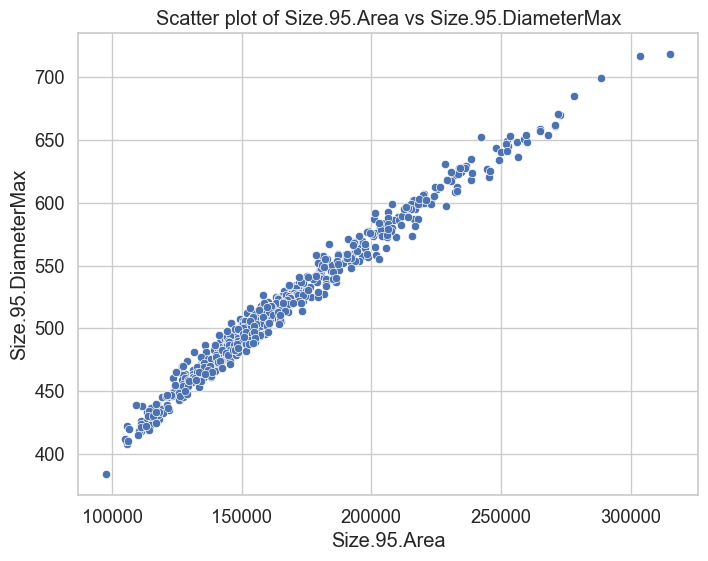

In [21]:
# Exploratory analysis: Comparing "Size.95.Area" and "Size.95.DiameterMax"
if 'Size.95.Area' in df.columns and 'Size.95.DiameterMax' in df.columns:
    df_size = df[['Size.95.Area', 'Size.95.DiameterMax']].dropna()
    corr = df_size.corr().iloc[0, 1]
    print("Correlation between Size.95.Area and Size.95.DiameterMax:", corr)
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_size, x='Size.95.Area', y='Size.95.DiameterMax')
    plt.title("Scatter plot of Size.95.Area vs Size.95.DiameterMax")
    plt.xlabel("Size.95.Area")
    plt.ylabel("Size.95.DiameterMax")
    plt.show()
else:
    print("Size.95.Area or Size.95.DiameterMax is missing in the dataset, correlation analysis cannot be performed.")


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\ROG\AppData\Local\Temp\ipykernel_37204\1146726174.py:1: SyntaxWarning: invalid escape sequence '\.'
  df_95 = df.filter(regex=".*\.95\..*")


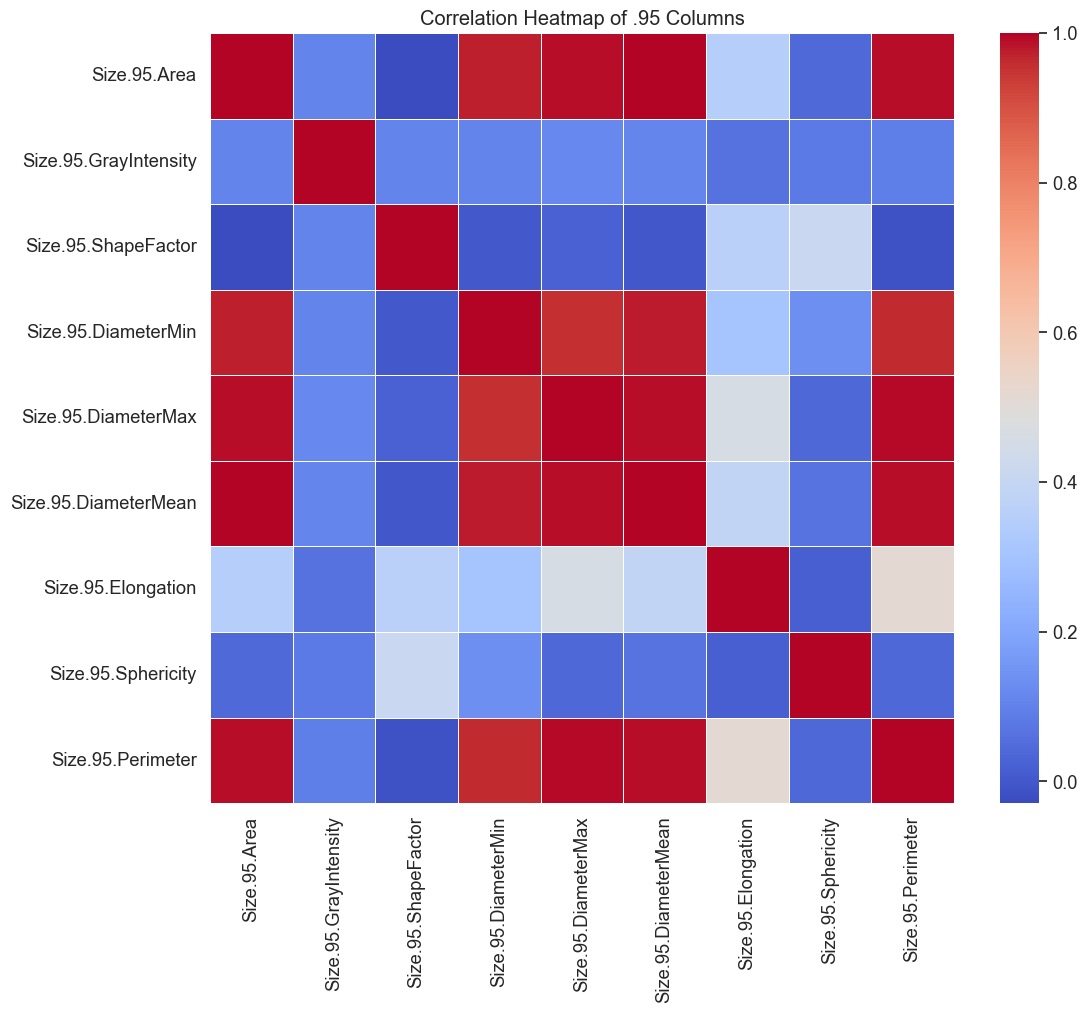

In [22]:
df_95 = df.filter(regex=".*\.95\..*")

# Compute the correlation matrix
corr_matrix = df_95.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)  # Set annot=True to display correlation values
plt.title("Correlation Heatmap of .95 Columns")
plt.show()


In [23]:
print(corr_matrix.round(2))


                       Size.95.Area  Size.95.GrayIntensity  \
Size.95.Area                   1.00                   0.11   
Size.95.GrayIntensity          0.11                   1.00   
Size.95.ShapeFactor           -0.03                   0.11   
Size.95.DiameterMin            0.97                   0.10   
Size.95.DiameterMax            0.99                   0.12   
Size.95.DiameterMean           1.00                   0.11   
Size.95.Elongation             0.35                   0.06   
Size.95.Sphericity             0.04                   0.08   
Size.95.Perimeter              0.99                   0.09   

                       Size.95.ShapeFactor  Size.95.DiameterMin  \
Size.95.Area                         -0.03                 0.97   
Size.95.GrayIntensity                 0.11                 0.10   
Size.95.ShapeFactor                   1.00                 0.00   
Size.95.DiameterMin                   0.00                 1.00   
Size.95.DiameterMax                   0.02  

In [24]:
# Features based on mean statistics
common_features_avg = ["Size.Mean.DiameterMean", "Size.Mean.GrayIntensity"]
features_A_avg = common_features_avg + ["Size.Mean.Sphericity", "Size.Mean.Elongation"]
features_B_avg = common_features_avg + ["Size.Mean.ShapeFactor", "Size.Mean.Elongation"]
features_C_avg = common_features_avg + ["Size.Mean.Sphericity", "Size.Mean.ShapeFactor", "Size.Mean.Elongation"]

feature_groups_avg = {
    "Group A (Avg Sphericity)": features_A_avg,
    "Group B (Avg ShapeFactor)": features_B_avg,
    "Group C (Avg Sphericity+ShapeFactor)": features_C_avg
}


# Features based on 95th percentile statistics
common_features_95 = ["Size.95.DiameterMean", "Size.95.GrayIntensity"]
features_A_95 = common_features_95 + ["Size.95.Sphericity", "Size.95.Elongation"]
features_B_95 = common_features_95 + ["Size.95.ShapeFactor", "Size.95.Elongation"]
features_C_95 = common_features_95 + ["Size.95.Sphericity", "Size.95.ShapeFactor", "Size.95.Elongation"]

feature_groups_95 = {
    "Group A (95 Sphericity)": features_A_95,
    "Group B (95 ShapeFactor)": features_B_95,
    "Group C (95 Sphericity+ShapeFactor)": features_C_95
}


Processing Feature Groups (Mean):
Processing Group A (Avg Sphericity)...


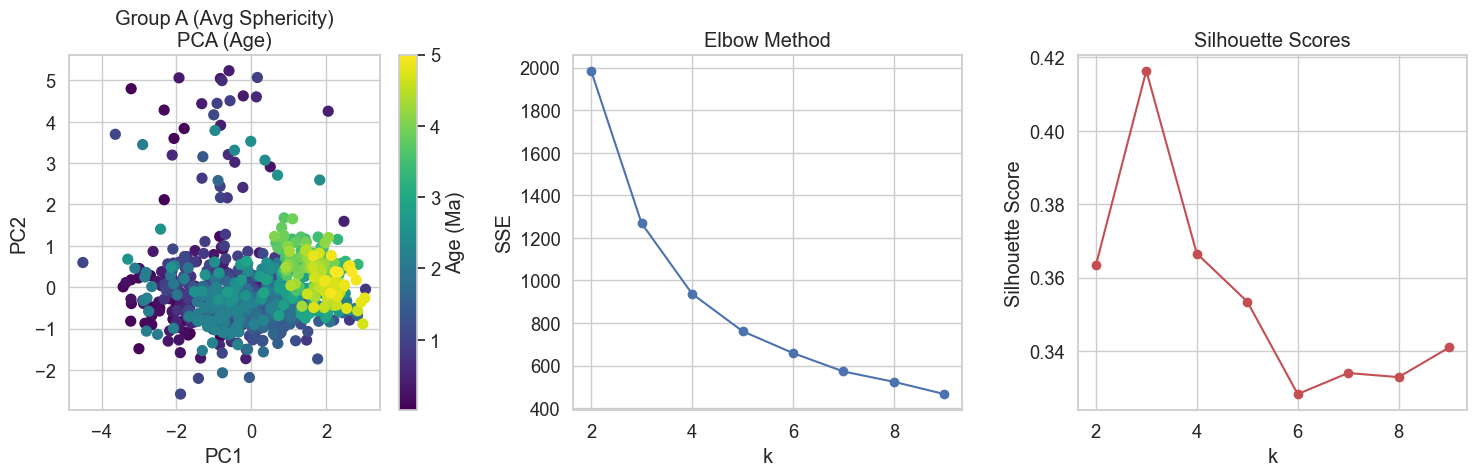

Group A (Avg Sphericity): Best k = 3, silhouette = 0.416


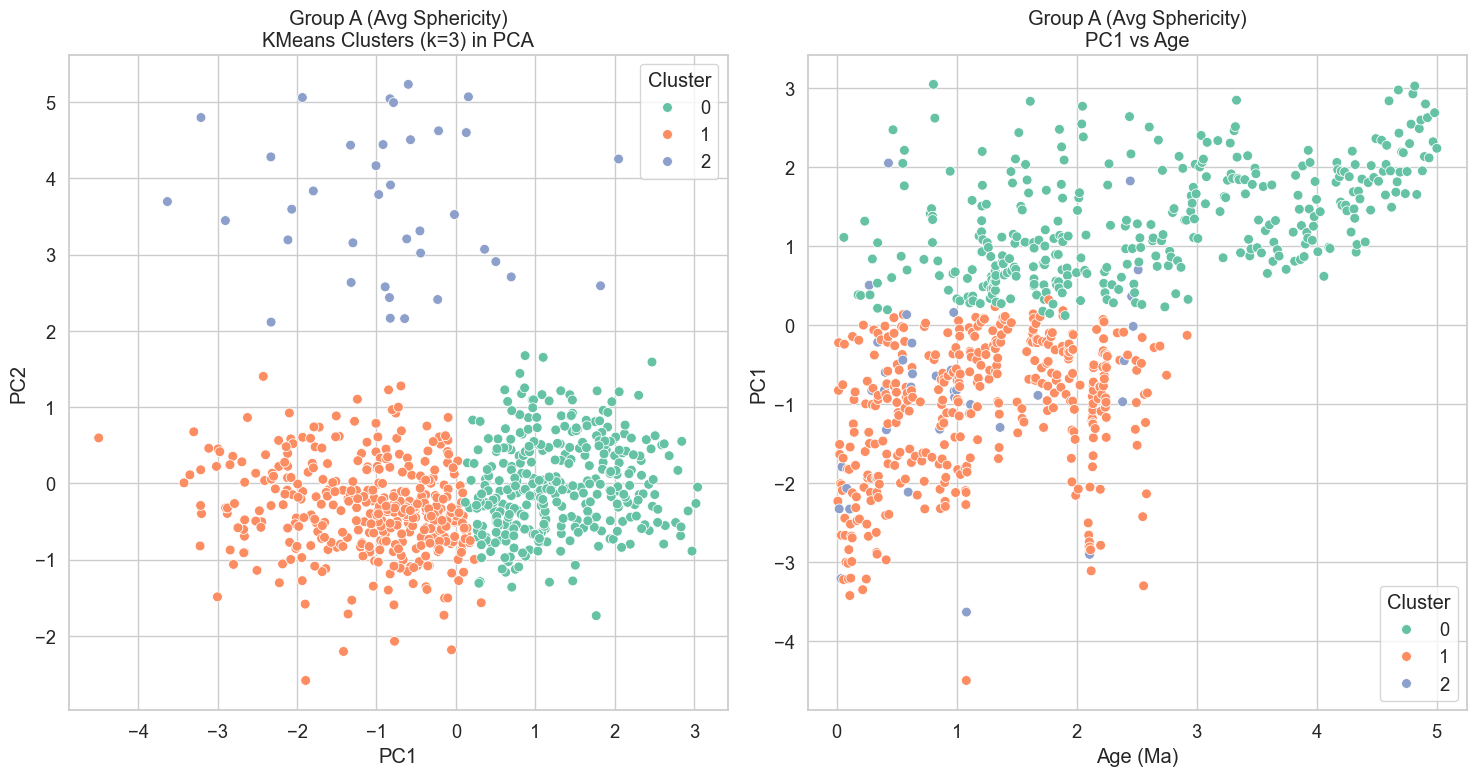

Group A (Avg Sphericity) Cluster Summary:
          Size.Mean.DiameterMean  Size.Mean.GrayIntensity  \
Cluster                                                    
0                    262.277667               105.111673   
1                    267.763661                97.148481   
2                    276.014584              7032.648173   

         Size.Mean.Sphericity  Size.Mean.Elongation   Age(Ma)  
Cluster                                                        
0                    0.700416              1.206202  2.601603  
1                    0.675476              1.231629  1.201616  
2                    0.683328              1.223812  0.956221  

Processing Group B (Avg ShapeFactor)...


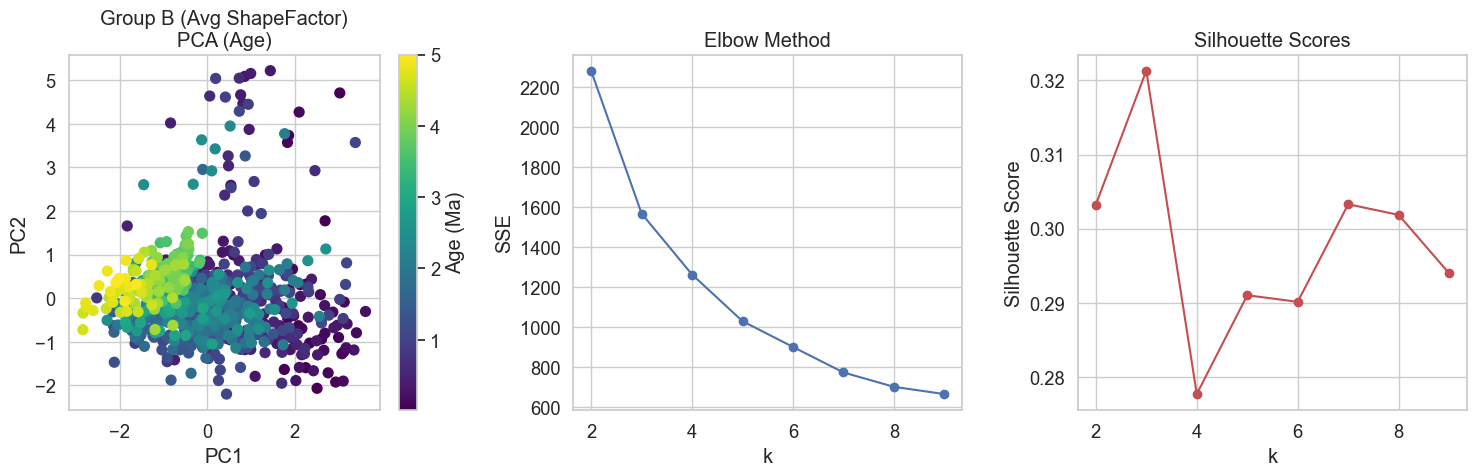

Group B (Avg ShapeFactor): Best k = 3, silhouette = 0.321


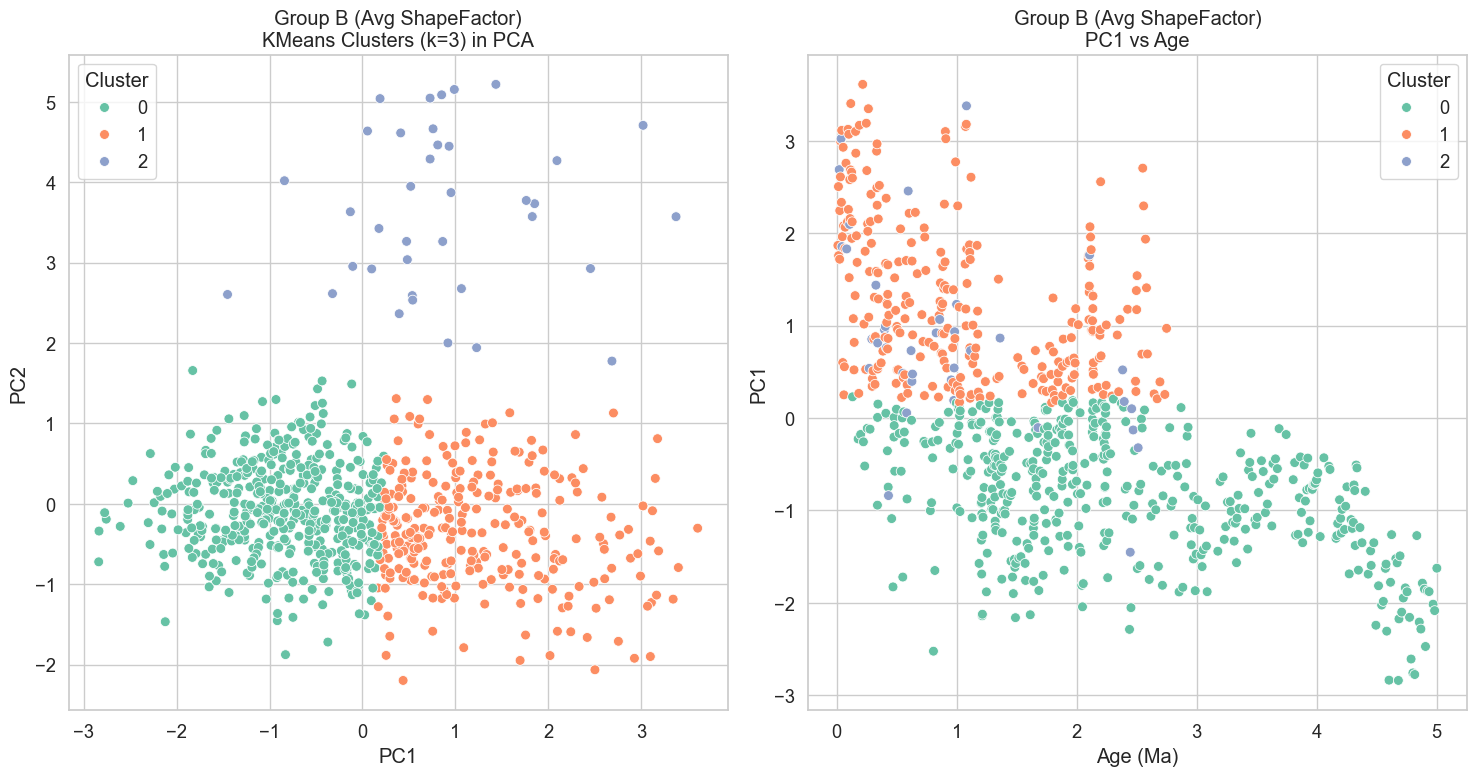

Group B (Avg ShapeFactor) Cluster Summary:
          Size.Mean.DiameterMean  Size.Mean.GrayIntensity  \
Cluster                                                    
0                    261.100672               106.018343   
1                    271.836787                92.545546   
2                    276.014584              7032.648173   

         Size.Mean.ShapeFactor  Size.Mean.Elongation   Age(Ma)  
Cluster                                                         
0                     0.812148              1.211588  2.351556  
1                     0.792179              1.232803  1.061049  
2                     0.804403              1.223812  0.956221  

Processing Group C (Avg Sphericity+ShapeFactor)...


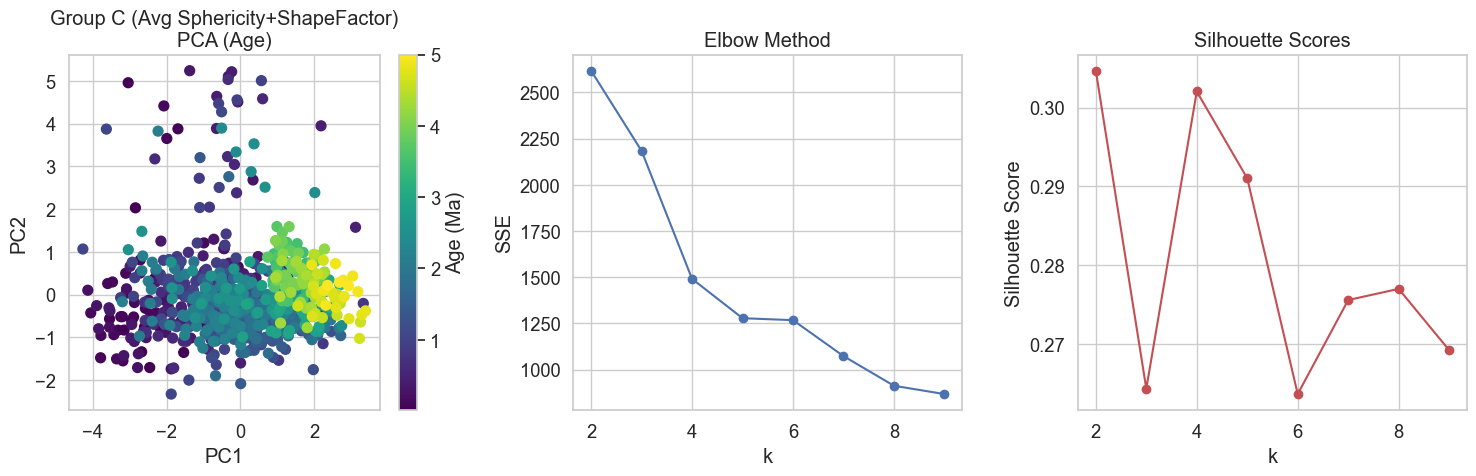

Group C (Avg Sphericity+ShapeFactor): Best k = 2, silhouette = 0.305


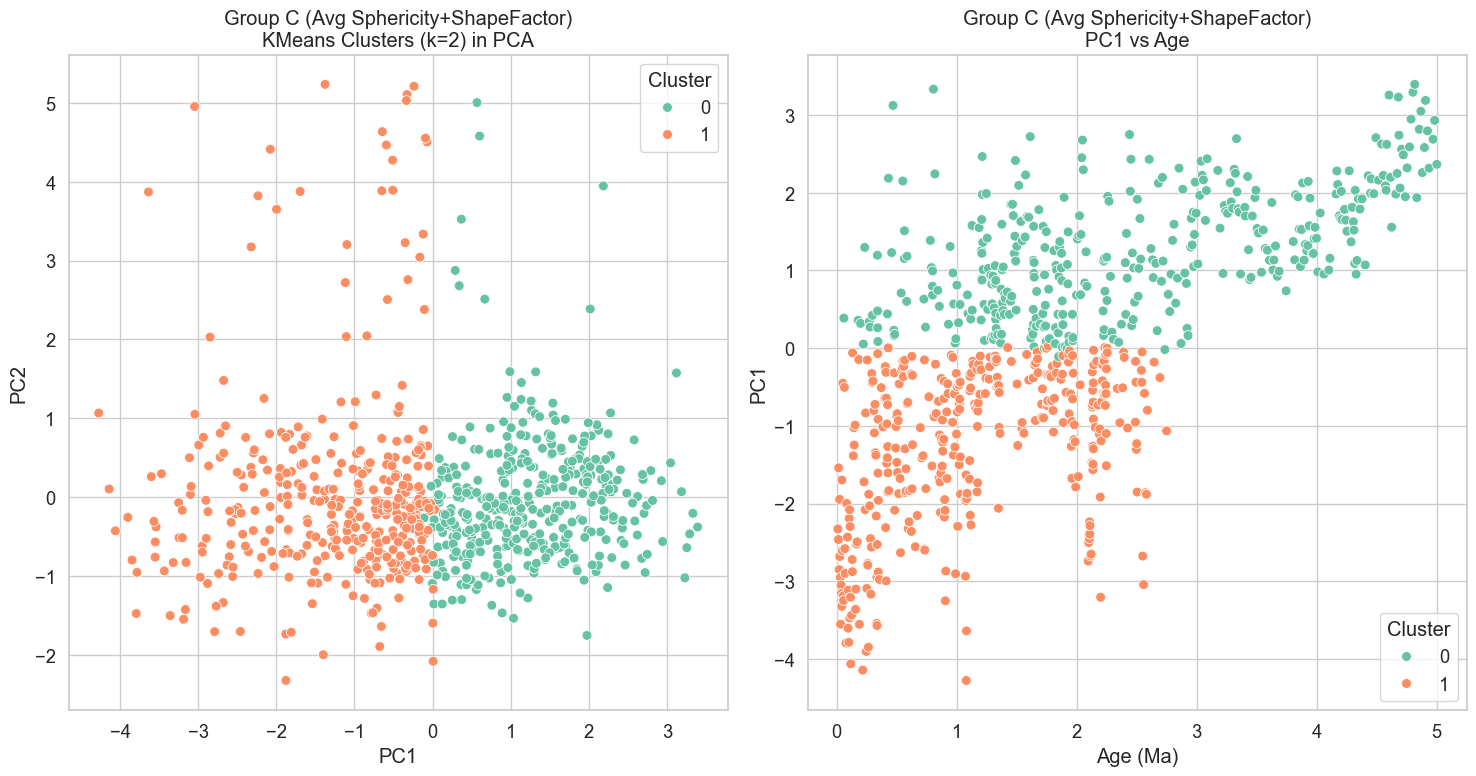

Group C (Avg Sphericity+ShapeFactor) Cluster Summary:
          Size.Mean.DiameterMean  Size.Mean.GrayIntensity  \
Cluster                                                    
0                    261.875783               253.496350   
1                    269.593353               618.665061   

         Size.Mean.Sphericity  Size.Mean.ShapeFactor  Size.Mean.Elongation  \
Cluster                                                                      
0                    0.698946               0.811284              1.207800   
1                    0.674920               0.797705              1.232112   

          Age(Ma)  
Cluster            
0        2.474250  
1        1.149474  

Processing Feature Groups (95th Percentile):
Processing Group A (95 Sphericity)...


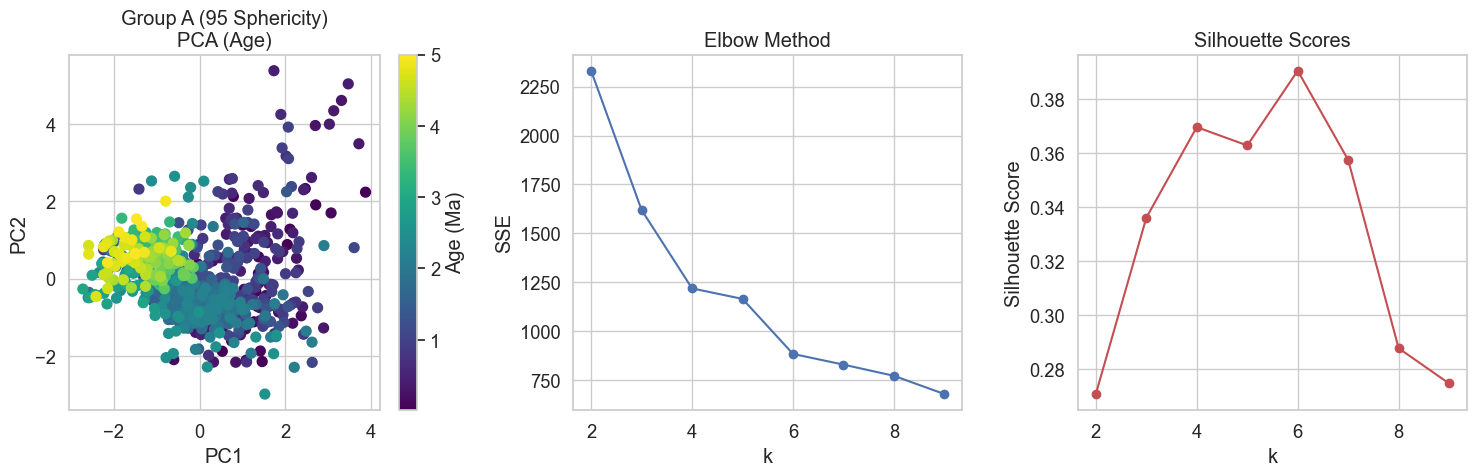

Group A (95 Sphericity): Best k = 6, silhouette = 0.390


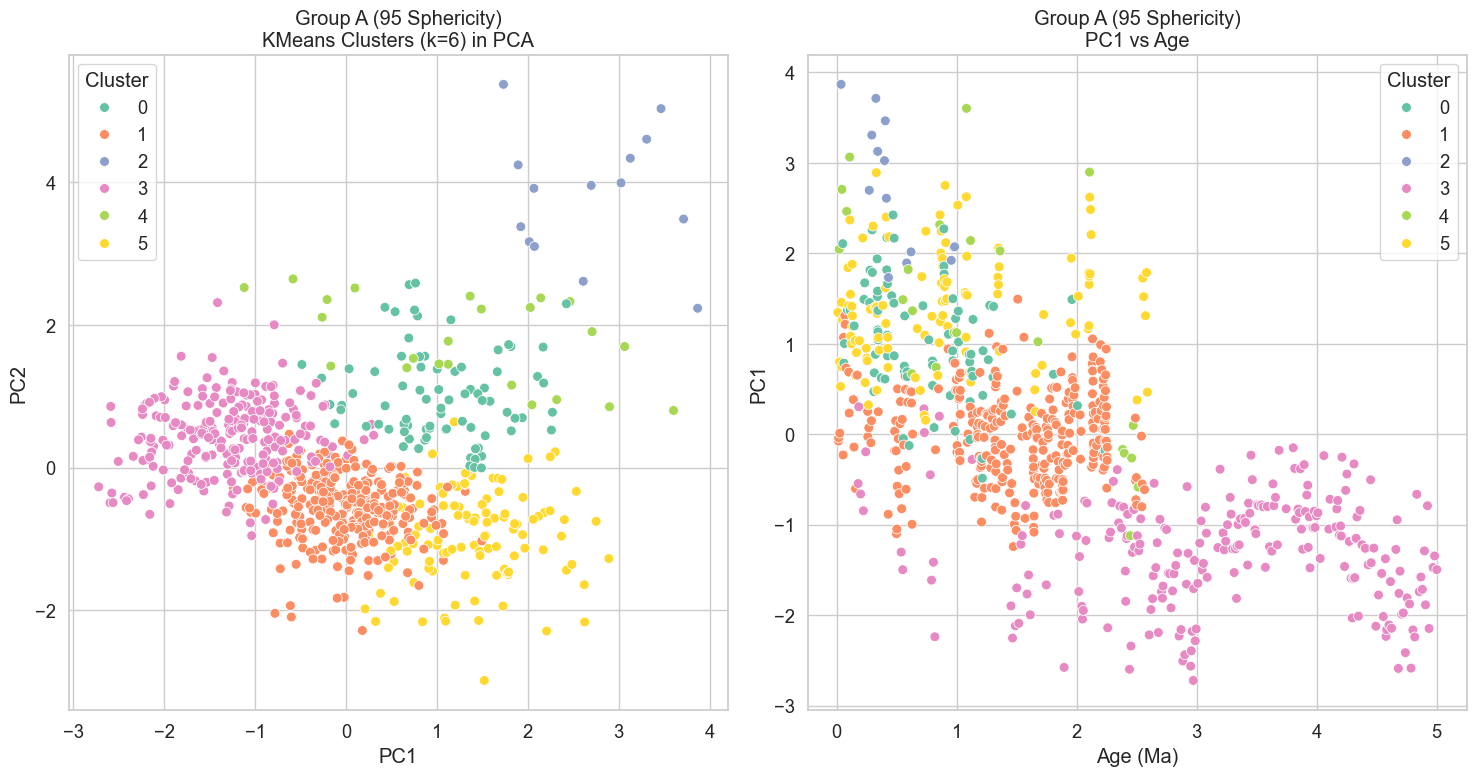

Group A (95 Sphericity) Cluster Summary:
          Size.95.DiameterMean  Size.95.GrayIntensity  Size.95.Sphericity  \
Cluster                                                                    
0                  466.983284             121.207284            0.920155   
1                  436.287685             119.855988            0.889959   
2                  485.730615           10066.085264            0.914285   
3                  426.402791             121.359760            0.896237   
4                  467.577583            7516.013069            0.889060   
5                  525.749879             113.161106            0.889091   

         Size.95.Elongation   Age(Ma)  
Cluster                                
0                  1.437537  0.741868  
1                  1.426267  1.479884  
2                  1.427273  0.502769  
3                  1.351363  3.202786  
4                  1.407130  1.232235  
5                  1.431914  0.916567  

Processing Group B (95 Shape

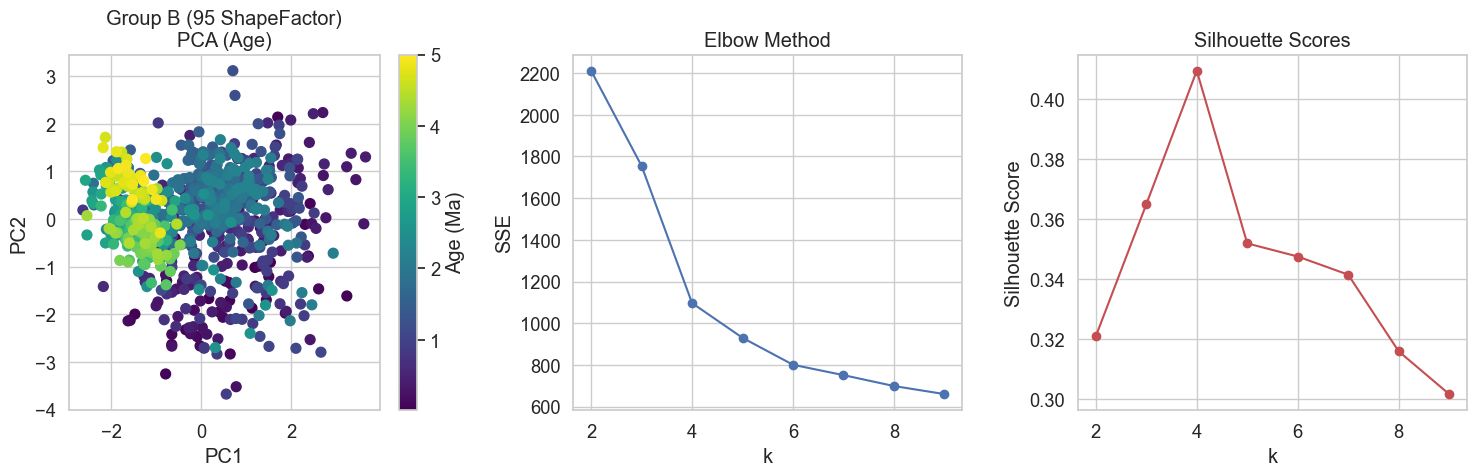

Group B (95 ShapeFactor): Best k = 4, silhouette = 0.410


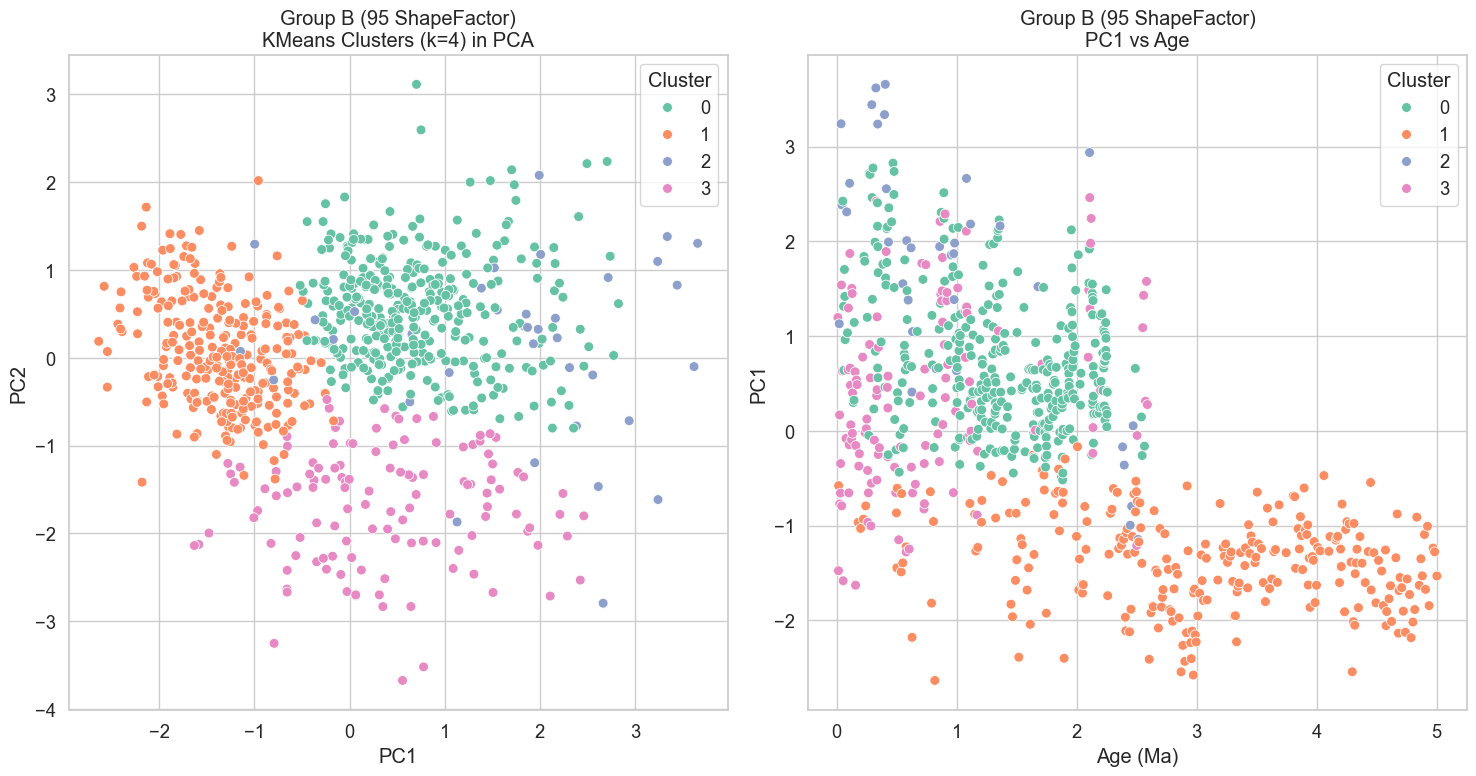

Group B (95 ShapeFactor) Cluster Summary:
          Size.95.DiameterMean  Size.95.GrayIntensity  Size.95.ShapeFactor  \
Cluster                                                                     
0                  448.765799             126.742262             0.866593   
1                  424.567341             119.628465             0.855938   
2                  474.446298            8480.905251             0.863179   
3                  508.751571              98.544849             0.850053   

         Size.95.Elongation   Age(Ma)  
Cluster                                
0                  1.432703  1.374095  
1                  1.357728  3.021134  
2                  1.414752  0.956221  
3                  1.424682  0.766099  

Processing Group C (95 Sphericity+ShapeFactor)...


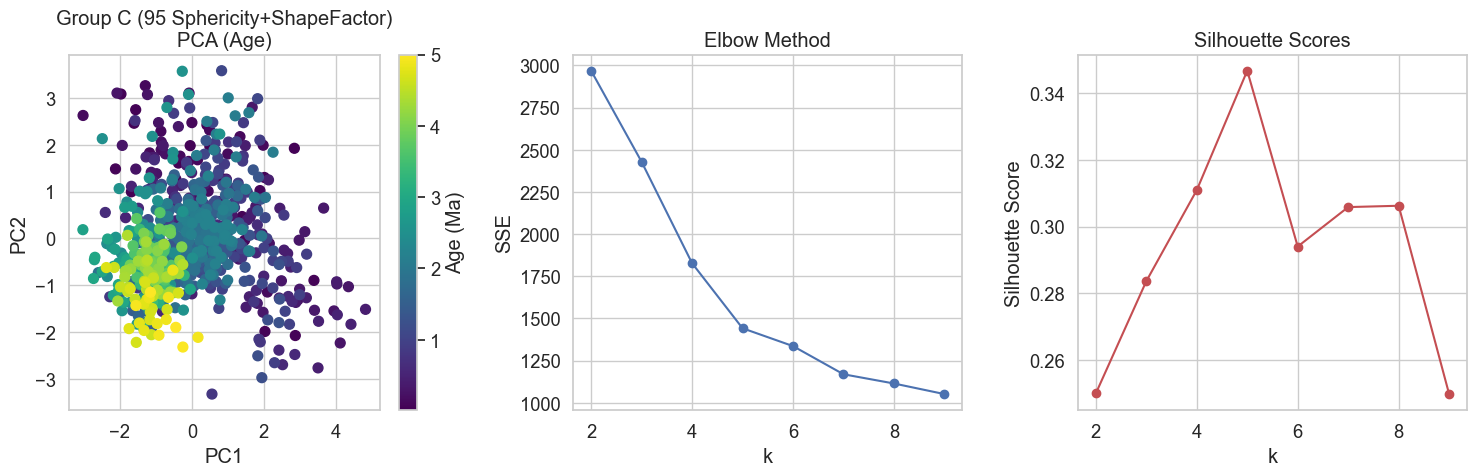

Group C (95 Sphericity+ShapeFactor): Best k = 5, silhouette = 0.347


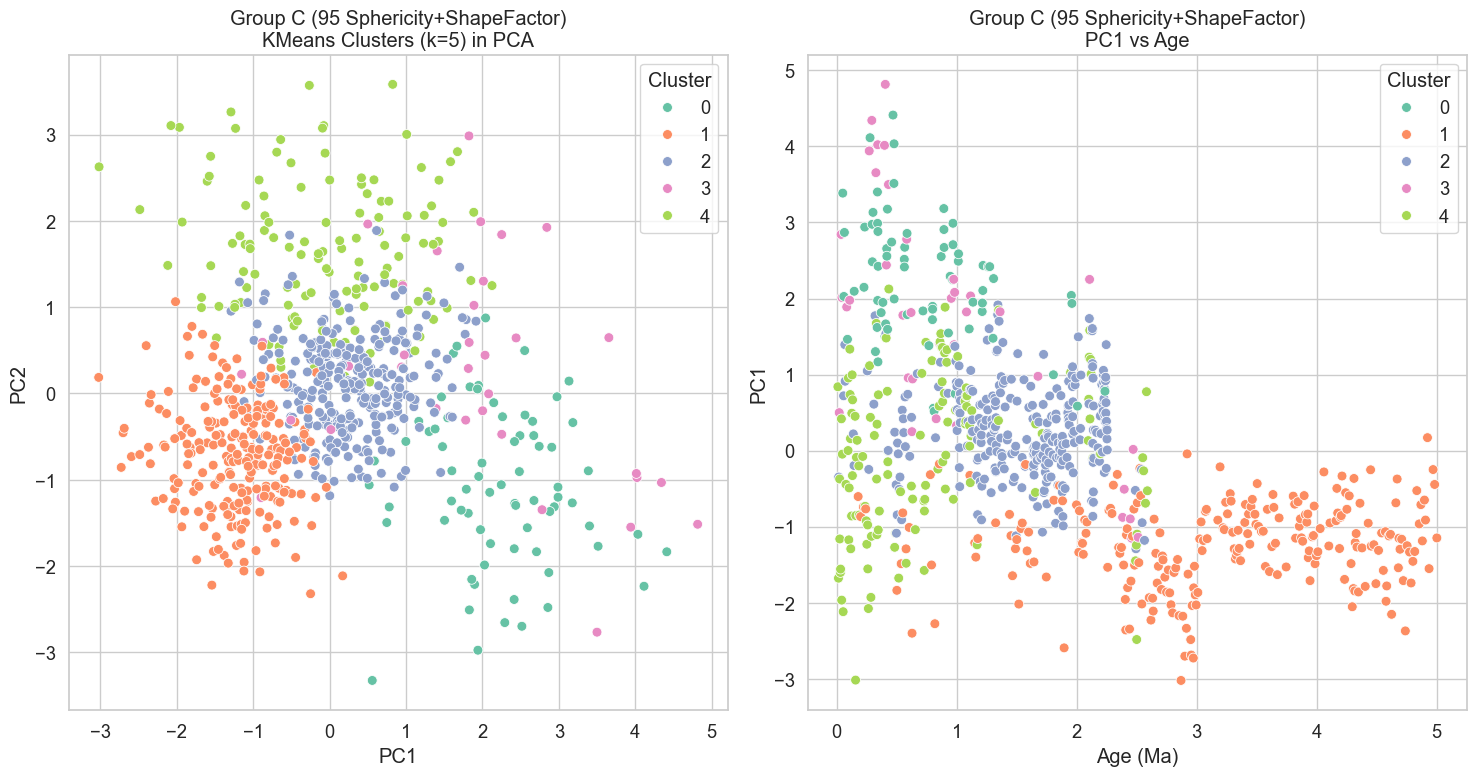

Group C (95 Sphericity+ShapeFactor) Cluster Summary:
          Size.95.DiameterMean  Size.95.GrayIntensity  Size.95.Sphericity  \
Cluster                                                                    
0                  470.544357             129.802145            0.921434   
1                  424.923942             119.685774            0.895881   
2                  439.261770             124.871675            0.890663   
3                  474.446298            8480.905251            0.898604   
4                  510.148065             101.269566            0.889348   

         Size.95.ShapeFactor  Size.95.Elongation   Age(Ma)  
Cluster                                                     
0                   0.873073            1.439849  0.737027  
1                   0.855790            1.353671  3.152377  
2                   0.864225            1.428433  1.537348  
3                   0.863179            1.414752  0.956221  
4                   0.851178            1.42557

In [25]:
def process_features_combined(df, feature_list, group_label):
    """
    Preprocesses the specified feature group, applies PCA for dimensionality reduction, 
    and performs KMeans clustering (selecting the optimal k from 2 to 9). 
    Combines visualisations into two plots:
    1. Evaluation plot: PCA scatter (coloured by Age), Elbow method, and Silhouette scores.
    2. Clustering results: PCA clustering plot and PC1 vs Age plot.
    
    Returns the clustered DataFrame and the best silhouette score.
    """
    # Select relevant columns (features + Age(Ma) and Key), removing missing values
    df_group = df[feature_list + ["Age(Ma)", "Key"]].dropna().copy()
    
    # Standardise the data
    scaler = StandardScaler()
    X = scaler.fit_transform(df_group[feature_list])
    
    # Perform PCA (reduce to 2 components) for visualisation
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # -------------------------
    # Plot 1: Evaluation (PCA scatter, Elbow method, Silhouette scores) — 1 row, 3 columns
    # -------------------------
    fig1, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Subplot 1: PCA scatter plot (coloured by Age)
    sc = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=df_group["Age(Ma)"], cmap="viridis", s=50)
    axes[0].set_xlabel("PC1")
    axes[0].set_ylabel("PC2")
    axes[0].set_title(f"{group_label}\nPCA (Age)")
    fig1.colorbar(sc, ax=axes[0], label="Age (Ma)")
    
    # Compute SSE and silhouette scores for k = 2 to 9
    sse = []
    sil_scores = []
    K_range = range(2, 10)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
        sil = silhouette_score(X, kmeans.labels_)
        sil_scores.append(sil)
    
    # Subplot 2: Elbow method (SSE vs k)
    axes[1].plot(K_range, sse, 'bo-')
    axes[1].set_xlabel("k")
    axes[1].set_ylabel("SSE")
    axes[1].set_title("Elbow Method")
    
    # Subplot 3: Silhouette scores vs k
    axes[2].plot(K_range, sil_scores, 'ro-')
    axes[2].set_xlabel("k")
    axes[2].set_ylabel("Silhouette Score")
    axes[2].set_title("Silhouette Scores")
    
    plt.tight_layout()
    plt.show()
    
    best_k = K_range[np.argmax(sil_scores)]
    best_sil = max(sil_scores)
    print(f"{group_label}: Best k = {best_k}, silhouette = {best_sil:.3f}")
    
    # -------------------------
    # Plot 2: Clustering results (PCA clustering and PC1 vs Age)
    # -------------------------
    # Apply KMeans clustering with the optimal k
    kmeans_final = KMeans(n_clusters=best_k, random_state=42)
    clusters = kmeans_final.fit_predict(X)
    df_group["Cluster"] = clusters
    
    fig2, axes2 = plt.subplots(1, 2, figsize=(15, 8))
    
    # Subplot 1: PCA clustering plot
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_group["Cluster"], palette="Set2", s=50, ax=axes2[0])
    axes2[0].set_xlabel("PC1")
    axes2[0].set_ylabel("PC2")
    axes2[0].set_title(f"{group_label}\nKMeans Clusters (k={best_k}) in PCA")
    
    # Subplot 2: PC1 vs Age (coloured by cluster)
    sns.scatterplot(x=df_group["Age(Ma)"], y=X_pca[:, 0], hue=df_group["Cluster"], palette="Set2", s=50, ax=axes2[1])
    axes2[1].set_xlabel("Age (Ma)")
    axes2[1].set_ylabel("PC1")
    axes2[1].set_title(f"{group_label}\nPC1 vs Age")
    
    plt.tight_layout()
    plt.show()
    
    # Print summary of cluster characteristics
    cluster_summary = df_group.groupby("Cluster")[feature_list + ["Age(Ma)"]].mean()
    print(f"{group_label} Cluster Summary:\n", cluster_summary)
    
    return df_group, best_sil

# Process feature groups based on mean values
results_avg = {}
print("Processing Feature Groups (Mean):")
for label, features in feature_groups_avg.items():
    print("=======================================")
    print(f"Processing {label}...")
    df_result, sil = process_features_combined(df, features, label)
    results_avg[label] = {"df": df_result, "silhouette": sil}
    print("=======================================\n")

# Process feature groups based on 95th percentile values
results_95 = {}
print("Processing Feature Groups (95th Percentile):")
for label, features in feature_groups_95.items():
    print("=======================================")
    print(f"Processing {label}...")
    df_result, sil = process_features_combined(df, features, label)
    results_95[label] = {"df": df_result, "silhouette": sil}
    print("=======================================\n")


### **Clustering Analysis Based on Different Statistical Measures**

#### **Mean-Based Clustering Analysis**
- **Group A (Avg Sphericity)**  
  The optimal number of clusters is **k = 3**, with a silhouette score of **0.416**. The combination of **Sphericity** and **Elongation** effectively differentiates the samples. However, one cluster exhibits an extremely high **GrayIntensity** value (7032), which may indicate an outlier or the influence of extreme individuals.  

- **Group B (Avg ShapeFactor)**  
  The optimal number of clusters is **k = 3**, with a silhouette score of **0.321**. The overall separation is weaker compared to **Group A**, suggesting that **ShapeFactor** is less effective in distinguishing morphological differences.  

- **Group C (Avg Sphericity+ShapeFactor)**  
  The optimal number of clusters is **k = 2**, with a silhouette score of **0.305**. The simultaneous inclusion of both **Sphericity** and **ShapeFactor** reduces interpretability, possibly due to redundancy or confounding effects.  

Overall, **Group A (Avg Sphericity)** provides the highest silhouette score, indicating that **Sphericity** and **Elongation** are effective in capturing morphological differences in terms of general trends.

#### **95th Percentile-Based Clustering Analysis**
- **Group A (95 Sphericity)**  
  The optimal number of clusters is **k = 6**, with a silhouette score of **0.390**. The use of **95th percentile** statistics emphasises extreme morphological values, increasing the optimal number of clusters. However, the silhouette score is slightly lower than that of **Group A (Avg Sphericity)**.  

- **Group B (95 ShapeFactor)**  
  The optimal number of clusters is **k = 4**, with a silhouette score of **0.410**. Under the **95th percentile** measure, the combination of **ShapeFactor** and **Elongation** yields a better clustering effect, achieving a silhouette score close to **0.41**.  

- **Group C (95 Sphericity+ShapeFactor)**  
  The optimal number of clusters is **k = 5**, with a silhouette score of **0.347**. The simultaneous inclusion of both shape descriptors results in reduced clustering quality, likely due to redundancy in the information.  

Thus, under the **95th percentile** measure, **Group B (95 ShapeFactor + Elongation)** performs best.

---

### **Interpretation and Selection of Statistical Measures**
#### **Significance of Statistical Measures**
- **Mean values** capture overall trends and may be more suitable for describing central morphological tendencies.  
- **95th percentile values** highlight extreme variations, revealing finer differences in upper-tail distributions, which often lead to a higher number of clusters (e.g., **k = 4–6**).  

#### **Perspective from Academic Discussion**
The focus is not necessarily on defining species precisely but on identifying **distinct morphological units** and their temporal variations.  
- If the primary objective is to examine **overall morphological trends**, **Group A (Avg Sphericity)** under the mean measure is preferable.  
- If the focus is on **extreme individuals or functional specialisation**, **Group B (95 ShapeFactor + Elongation)** under the **95th percentile** measure is more meaningful.  


In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ---------------------------
# PCA computation for Group A with 2 components
# ---------------------------
print("Group A (Avg Sphericity) PCA Transformation Matrix (n_components=2):")

# Select features and remove missing values
data_A = df[features_A_avg].dropna().copy()

scaler_A = StandardScaler()
X_A = scaler_A.fit_transform(data_A)

# Perform PCA with 2 components
pca_A = PCA(n_components=2, random_state=42)
pca_A.fit(X_A)

# Construct PCA loading matrix
components_A_df = pd.DataFrame(pca_A.components_, 
                               columns=features_A_avg, 
                               index=[f"PC{i+1}" for i in range(2)])

# Construct explained variance ratio DataFrame
variance_A_df = pd.DataFrame(pca_A.explained_variance_ratio_, 
                             columns=["Explained Variance Ratio"], 
                             index=[f"PC{i+1}" for i in range(2)])

# Round values to 3 decimal places
components_A_df = components_A_df.round(3)
variance_A_df = variance_A_df.round(3)

print(components_A_df)
print("\nExplained Variance Ratio:")
print(variance_A_df)

print("\n" + "="*60 + "\n")

# ---------------------------
# PCA computation for Group B with 2 components
# ---------------------------
print("Group B (95 ShapeFactor) PCA Transformation Matrix (n_components=2):")

data_B = df[features_B_95].dropna().copy()

scaler_B = StandardScaler()
X_B = scaler_B.fit_transform(data_B)

pca_B = PCA(n_components=2, random_state=42)
pca_B.fit(X_B)

components_B_df = pd.DataFrame(pca_B.components_, 
                               columns=features_B_95, 
                               index=[f"PC{i+1}" for i in range(2)])

variance_B_df = pd.DataFrame(pca_B.explained_variance_ratio_, 
                             columns=["Explained Variance Ratio"], 
                             index=[f"PC{i+1}" for i in range(2)])

components_B_df = components_B_df.round(3)
variance_B_df = variance_B_df.round(3)

print(components_B_df)
print("\nExplained Variance Ratio:")
print(variance_B_df)


Group A (Avg Sphericity) PCA Transformation Matrix (n_components=2):
     Size.Mean.DiameterMean  Size.Mean.GrayIntensity  Size.Mean.Sphericity  \
PC1                  -0.235                   -0.087                 0.685   
PC2                   0.596                    0.774                 0.152   

     Size.Mean.Elongation  
PC1                -0.684  
PC2                -0.151  

Explained Variance Ratio:
     Explained Variance Ratio
PC1                     0.514
PC2                     0.271


Group B (95 ShapeFactor) PCA Transformation Matrix (n_components=2):
     Size.95.DiameterMean  Size.95.GrayIntensity  Size.95.ShapeFactor  \
PC1                 0.506                  0.259                0.473   
PC2                -0.685                  0.043                0.727   

     Size.95.Elongation  
PC1               0.673  
PC2              -0.012  

Explained Variance Ratio:
     Explained Variance Ratio
PC1                     0.392
PC2                     0.251


### **Principal Component Analysis (PCA) Results**

#### **Group A (Avg Sphericity)**  

- **Explained Variance Ratio:**  
  - **PC1:** 51.4%  
  - **PC2:** 27.1%  
  - **Total (PC1 + PC2):** 78.5%  

- **Interpretation:**  
  - **PC1:**  
    - Primarily driven by **Sphericity (±0.685)** and **Elongation (-0.684)**, with nearly equal but opposite contributions.  
    - This suggests that **PC1 captures shape variation**, ranging from **high sphericity (rounder forms) to high elongation (more elongated forms)**.  
    - **DiameterMean and GrayIntensity** contribute minimally, indicating that **shape dominates PC1**.  
  - **PC2:**  
    - Mainly influenced by **Size.Mean.DiameterMean (0.596)** and **Size.Mean.GrayIntensity (0.774)**.  
    - This indicates that **PC2 reflects overall size and grayscale intensity**, which may be related to individual size or material composition.  
    - **Sphericity and Elongation** have negligible contributions to PC2.  

- **Overall Findings:**  
  - The first two principal components explain approximately **78.5% of the total variance**, indicating that these two components **effectively capture the major variation in the data**.  
  - **Group A (Avg Sphericity) successfully separates shape (PC1) and size (PC2) information**, facilitating subsequent clustering and morphological evolution analyses.  

---

#### **Group B (95 ShapeFactor)**  

- **Explained Variance Ratio:**  
  - **PC1:** 39.2%  
  - **PC2:** 25.1%  
  - **Total (PC1 + PC2):** 64.3%  

- **Interpretation:**  
  - **PC1:**  
    - **Contributions are more evenly distributed**, with **Elongation (0.673)** being the most significant, followed by **DiameterMean and ShapeFactor** with moderate positive contributions.  
    - This suggests that **PC1 represents a combined “size + shape” dimension**, with a stronger emphasis on elongation.  
  - **PC2:**  
    - Primarily driven by **DiameterMean (-0.685)** and **ShapeFactor (0.727)**, highlighting a **contrast between these two features**.  
    - **GrayIntensity and Elongation contribute minimally** to PC2.  

- **Overall Findings:**  
  - The first two principal components explain **64.3% of the total variance**, capturing less information compared to **Group A**.  
  - The use of **95th percentile statistics introduces extreme values, potentially increasing data complexity and reducing the explained variance**.  
  - The separation of **shape and size dimensions** is less clear than in **Group A**, making morphological patterns more difficult to interpret.  

---

### **Comparison and Implications**
- **Group A (Avg Sphericity)** clearly separates **shape (PC1) and size (PC2)**, making it **more effective for morphological analysis**.  
- **Group B (95 ShapeFactor)** captures a **more complex combination of size and shape**, but **fails to cleanly separate these dimensions**.  
- **The choice of statistical measure affects PCA performance**, with **mean values providing a clearer distinction** between morphological traits, while **95th percentile values introduce more variance and complexity**.  

This analysis suggests that **mean-based statistics (Group A) may be more suitable for capturing overall morphological trends**, while **95th percentile-based statistics (Group B) may be better for highlighting extreme morphological variations**.

### **Comparative Analysis and Recommendations**  

#### **Feature Interpretation Perspective**  
- **Group A (Mean-Based Statistics):**  
  - **PC1 primarily reflects the contrast between Sphericity and Elongation**, capturing variations in shape.  
  - **PC2 predominantly represents overall size and grayscale intensity**.  
  - The first two principal components explain approximately **78.5% of the total variance**, indicating that **this statistical measure effectively captures the primary variation in the data**.  

- **Group B (95th Percentile-Based Statistics):**  
  - While **PC1 and PC2 provide some meaningful information**, the cumulative explained variance is only **64.3%**, significantly lower than in **Group A**.  
  - **The two principal components exhibit a more mixed interpretation**, where **shape and size information are less distinctly separated** compared to **Group A**.  

#### **Clustering and Interpretation**  
- Based on clustering analysis, **Group A (mean-based) yields slightly better clustering performance** (**silhouette score = 0.416, optimal k = 3**) than **Group B (95th percentile-based)** (**silhouette score = 0.410, optimal k = 4**).  
- In conjunction with the **PCA results**, **Group A (mean-based)** provides a **clearer representation of morphological variation**, making it more suitable for discussing **biological and geological implications of morphological diversity over time**.  

#### **Recommendations**  
- **Group A (mean-based) is preferable when the focus is on capturing overall morphological trends**, as it effectively separates shape and size dimensions.  
- **Group B (95th percentile-based) may be useful for identifying extreme morphological variations**, but it introduces more complexity and less interpretable principal components.  
- Further analysis could include:  
  - **Assessing outliers** (e.g., clusters with extreme **GrayIntensity** values).  
  - **Examining temporal distributions** of clusters to detect potential evolutionary trends.  
  - **Integrating additional environmental variables** (e.g., temperature, productivity) to validate the biological and geological significance of clustering results.  

In summary, **Group A (mean-based Sphericity and Elongation) provides a more interpretable framework for morphological analysis, while Group B (95th percentile-based ShapeFactor and Elongation) may be useful for capturing extreme morphological traits**. The choice of statistical measure should align with the specific research objectives.

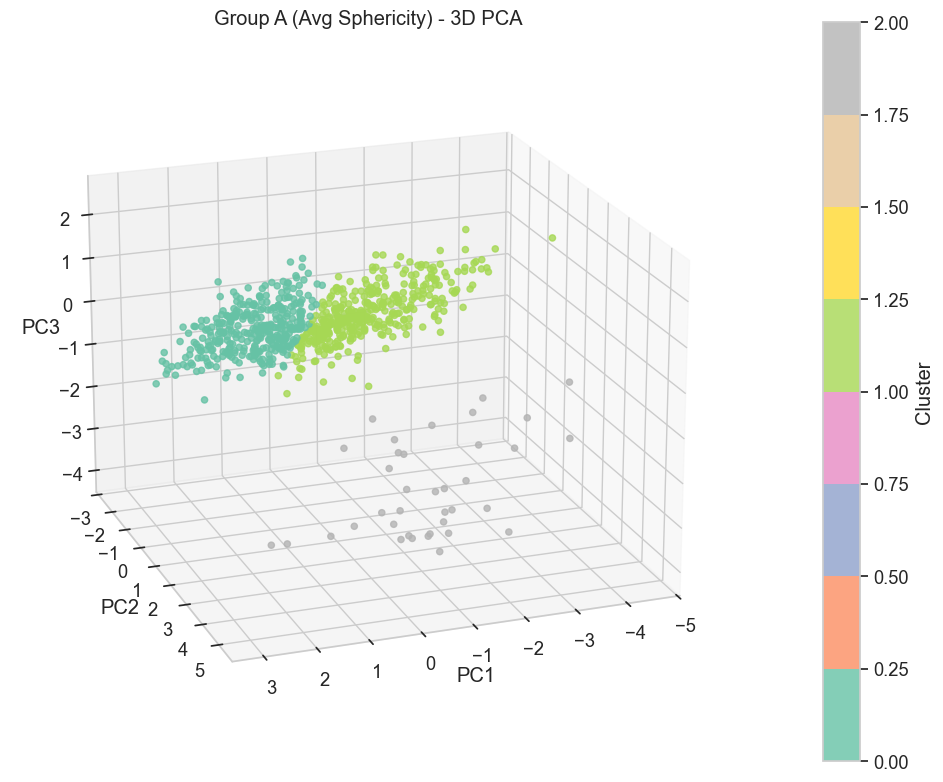

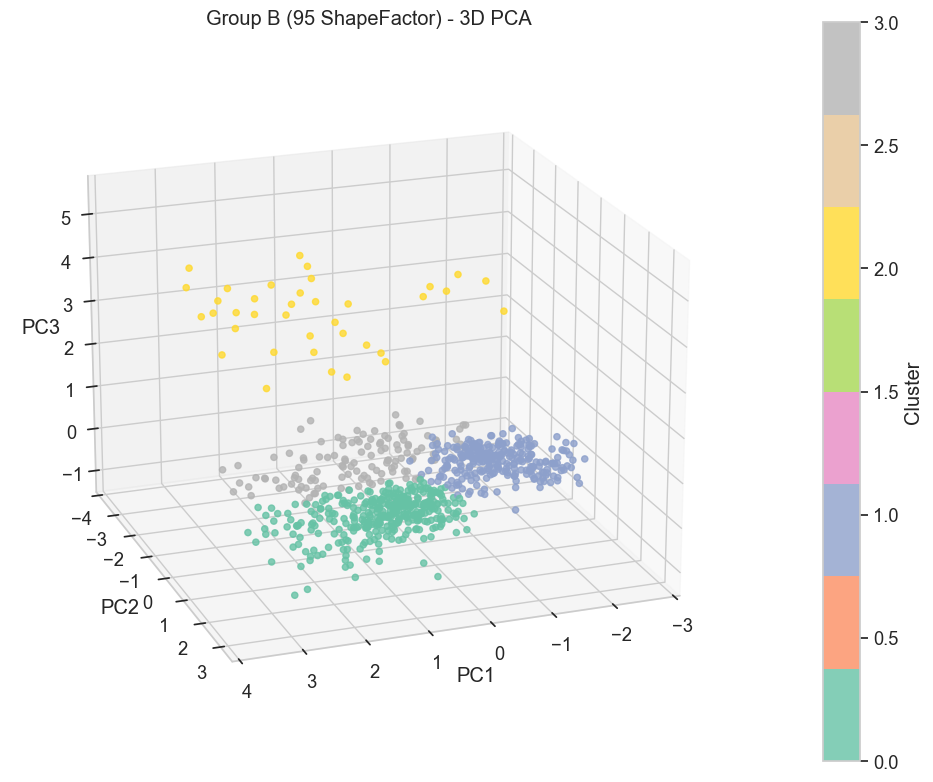

In [27]:
from mpl_toolkits.mplot3d import Axes3D

# Define a streamlined function for 3D PCA visualisation
def plot_3d_pca_clusters(df, feature_cols, n_clusters, title="", point_size=40):
    """
    Standardises the specified features, reduces dimensions to 3 using PCA, 
    and applies KMeans clustering (n_clusters). 
    Generates a 3D scatter plot with colour-coded clusters.
    
    :param df: DataFrame containing the specified features
    :param feature_cols: List of features to use
    :param n_clusters: Number of clusters
    :param title: Plot title
    :param point_size: Size of scatter points (default: 40)
    """
    data = df[feature_cols].dropna().copy()
    X = StandardScaler().fit_transform(data)
    
    # Perform PCA (reduce to 3 components)
    pca_3d = PCA(n_components=3)
    X_3d = pca_3d.fit_transform(X)
    
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    sc = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2],
                    c=labels, cmap="Set2", s=point_size, alpha=0.8)
    
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title(title)
    
    cbar = plt.colorbar(sc, ax=ax, pad=0.1)
    cbar.set_label("Cluster")
    
    # Adjust viewing angle
    ax.view_init(elev=20, azim=70)
    plt.tight_layout()
    plt.show()

# Example: 3D PCA visualisation for Group A (Avg) and Group B (95)

# Based on previous results:
# Group A (Avg Sphericity)
features_A_avg = feature_groups_avg["Group A (Avg Sphericity)"]
plot_3d_pca_clusters(df, features_A_avg, n_clusters=3,
                     title="Group A (Avg Sphericity) - 3D PCA", point_size=20)

# Group B (95 ShapeFactor)
features_B_95 = feature_groups_95["Group B (95 ShapeFactor)"]
plot_3d_pca_clusters(df, features_B_95, n_clusters=4,
                     title="Group B (95 ShapeFactor) - 3D PCA", point_size=20)


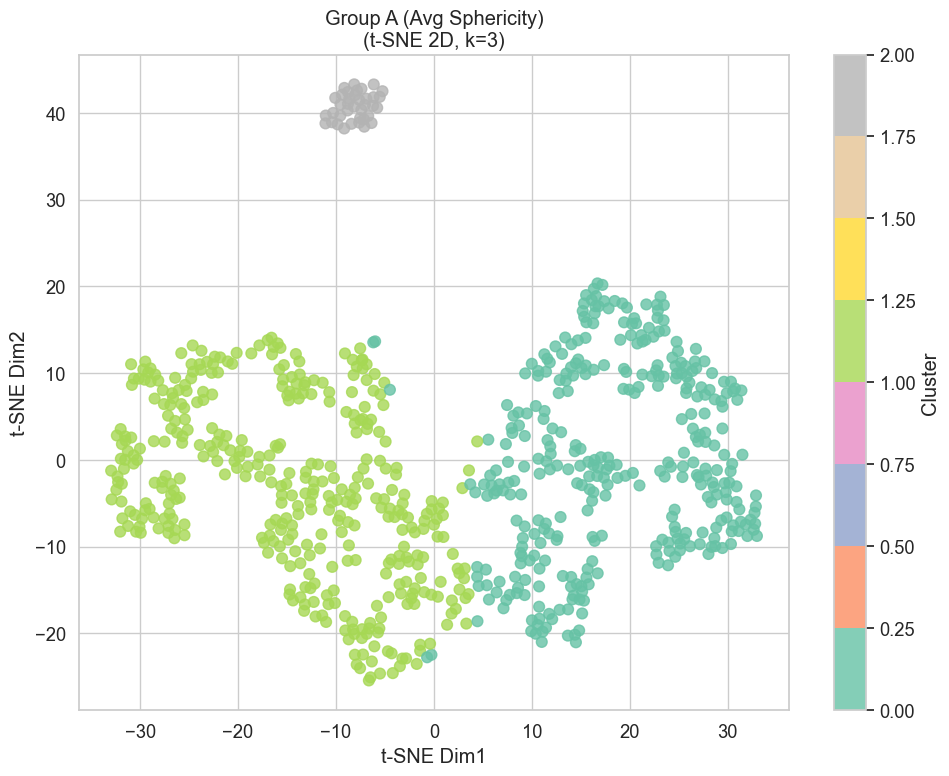

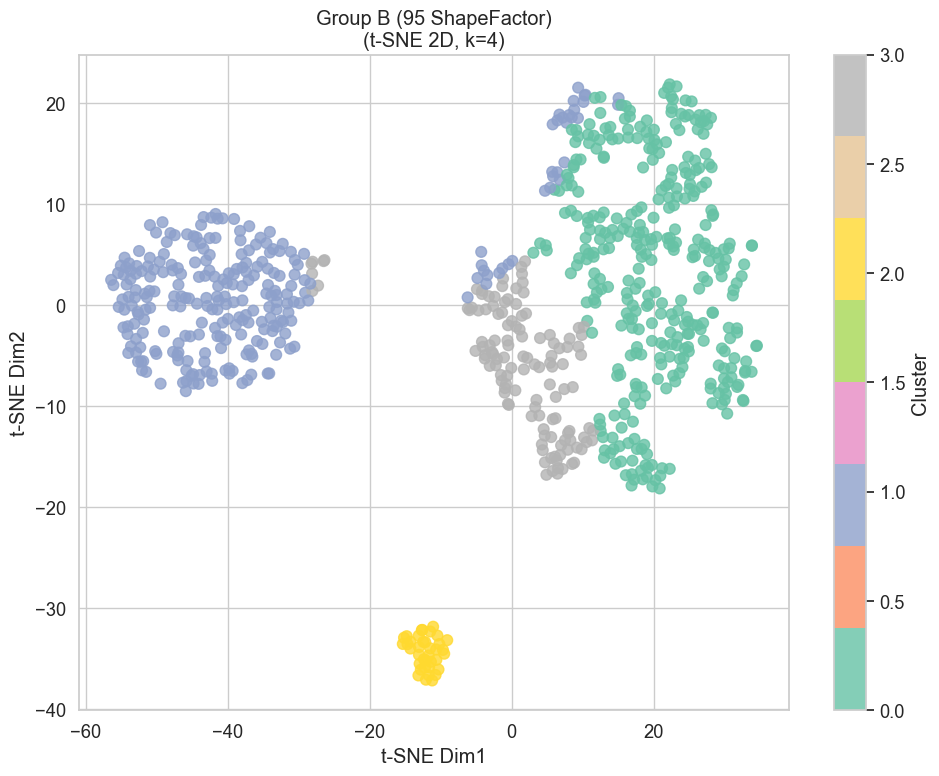

In [28]:
from sklearn.manifold import TSNE

def plot_tsne_clusters(df, feature_cols, n_clusters, title="", perplexity=30.0):
    """
    Standardises the specified features, applies t-SNE for dimensionality reduction (to 2D), 
    and performs KMeans clustering (n_clusters). 
    Generates a 2D scatter plot with colour-coded clusters and a colour bar.

    :param df: DataFrame containing the specified features
    :param feature_cols: List of features to use
    :param n_clusters: Number of clusters
    :param title: Plot title
    :param perplexity: t-SNE perplexity parameter (default: 30.0)
    """
    data = df[feature_cols].dropna().copy()
    scaler = StandardScaler()
    X = scaler.fit_transform(data)
    
    # Apply t-SNE to reduce to 2 dimensions
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    
    # Plot 2D scatter plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap="Set2", s=60, alpha=0.8)
    plt.title(f"{title}\n(t-SNE 2D, k={n_clusters})")
    plt.xlabel("t-SNE Dim1")
    plt.ylabel("t-SNE Dim2")
    
    cbar = plt.colorbar(scatter)
    cbar.set_label("Cluster")
    
    plt.tight_layout()
    plt.show()

# Example: Group A (Avg Sphericity), k=3
plot_tsne_clusters(df, features_A_avg, n_clusters=3, 
                   title="Group A (Avg Sphericity)", perplexity=30.0)

# Example: Group B (95 ShapeFactor), k=4
plot_tsne_clusters(df, features_B_95, n_clusters=4, 
                   title="Group B (95 ShapeFactor)", perplexity=30.0)


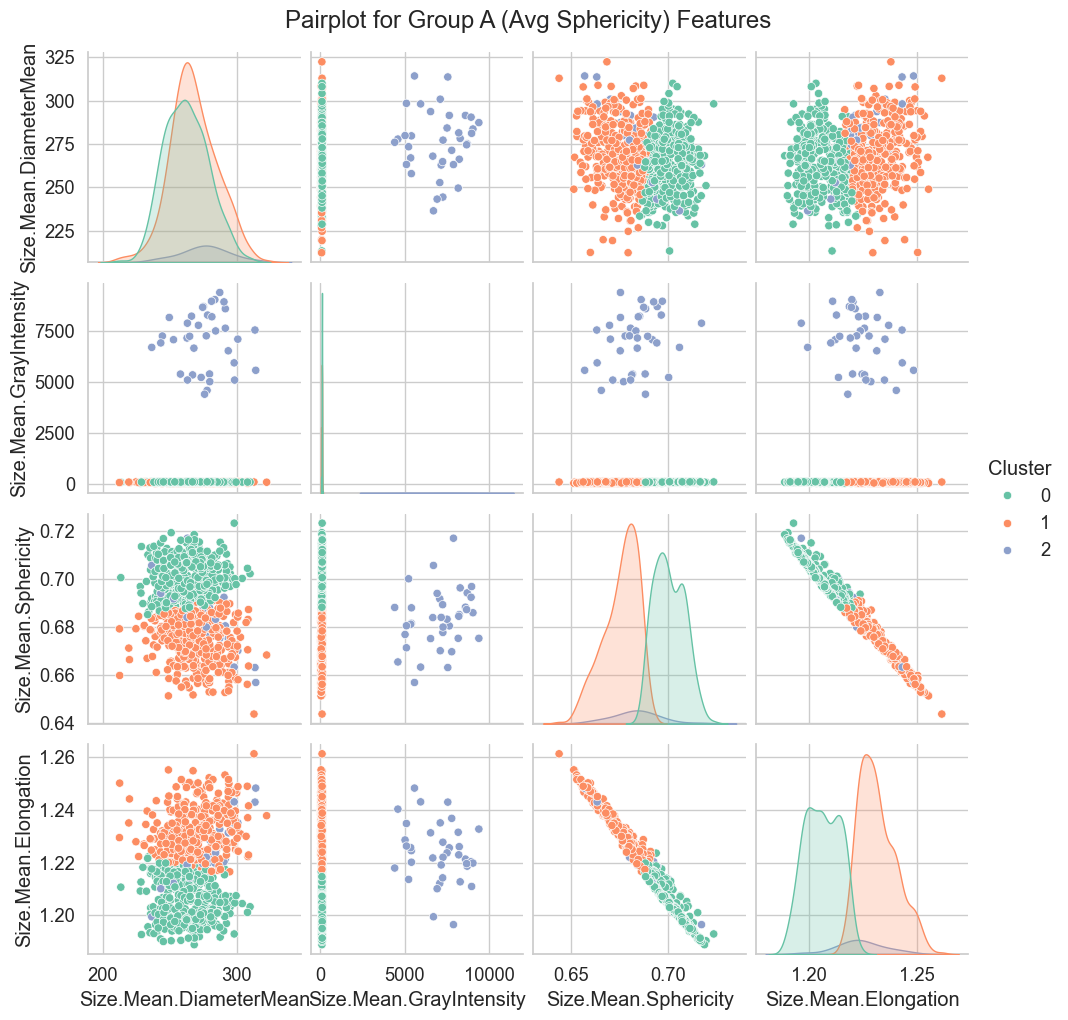

In [ ]:
# Generate a pairplot for Group A (Avg Sphericity).
df_A_avg = df[features_A_avg + ["Age(Ma)", "Key"]].dropna().copy()

scaler_A = StandardScaler()
X_A_avg = scaler_A.fit_transform(df_A_avg[features_A_avg])

kmeans_A_avg = KMeans(n_clusters=3, random_state=42)
df_A_avg["Cluster"] = kmeans_A_avg.fit_predict(X_A_avg)

sns.pairplot(df_A_avg[features_A_avg + ["Cluster"]], hue="Cluster", palette="Set2", diag_kind="kde")
plt.suptitle("Pairplot for Group A (Avg Sphericity) Features", y=1.02)
plt.show()
